In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import fppnpx as fn
from fppnpx.FPPGLM import FPPGLM
from fppnpx.signalfuncs import load_signal, gen_all_channel_signals
from wavemapnpx.WaveMAPClassifier import WaveMAPClassifier

/opt/miniconda3/envs/wavemapspec/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Color

In [3]:
from plottools import WAVEMAP_PAL, ml_map, cmap

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

## Analysis

In [2]:
apath = "/Users/mateouma/Downloads/monkey datasets/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0_t0.exported.imec0.lf.bin"
cpath = "/Users/mateouma/Downloads/monkey datasets/cluster_info_task.tsv"
wpath = "/Users/mateouma/Downloads/monkey datasets/20230630_DLPFCwaveforms.mat"

fs = 2500
time_window = [100,123] # seconds within the recording

signal_dataset = load_signal(appath=apath, time_window=time_window, fs=fs, cipath=cpath, wfpath=wpath)
channel_signals = gen_all_channel_signals(signal_dataset, 300, False)

Generated 112 channel signals.


In [49]:
apath2 = "/Users/mateouma/Downloads/monkey datasets/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0_t0.exported.imec0.ap-001.bin"
cpath2 = "/Users/mateouma/Downloads/monkey datasets/cluster_info_task.tsv"
wpath2 = "/Users/mateouma/Downloads/monkey datasets/20230630_DLPFCwaveforms.mat"

fs2 = 30000

signal_dataset2 = load_signal(appath=apath2, time_window=time_window, fs=fs2, cipath=cpath2, wfpath=wpath2)
channel_signals2 = gen_all_channel_signals(signal_dataset2, 300, False)

Generated 112 channel signals.


In [51]:
u296_instances,u296_filters,theor_freqs = channel_signals['ch163'].generate_unit_filters(selected_unit=296, truncate_idx=74)

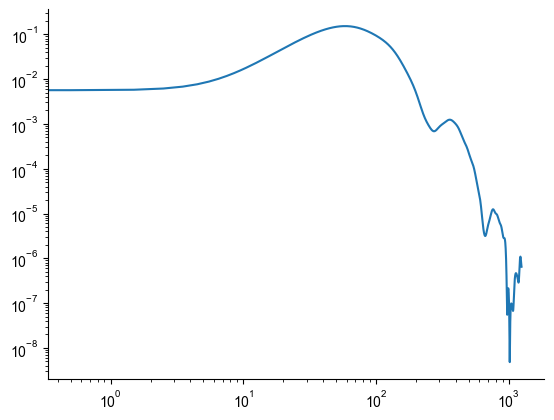

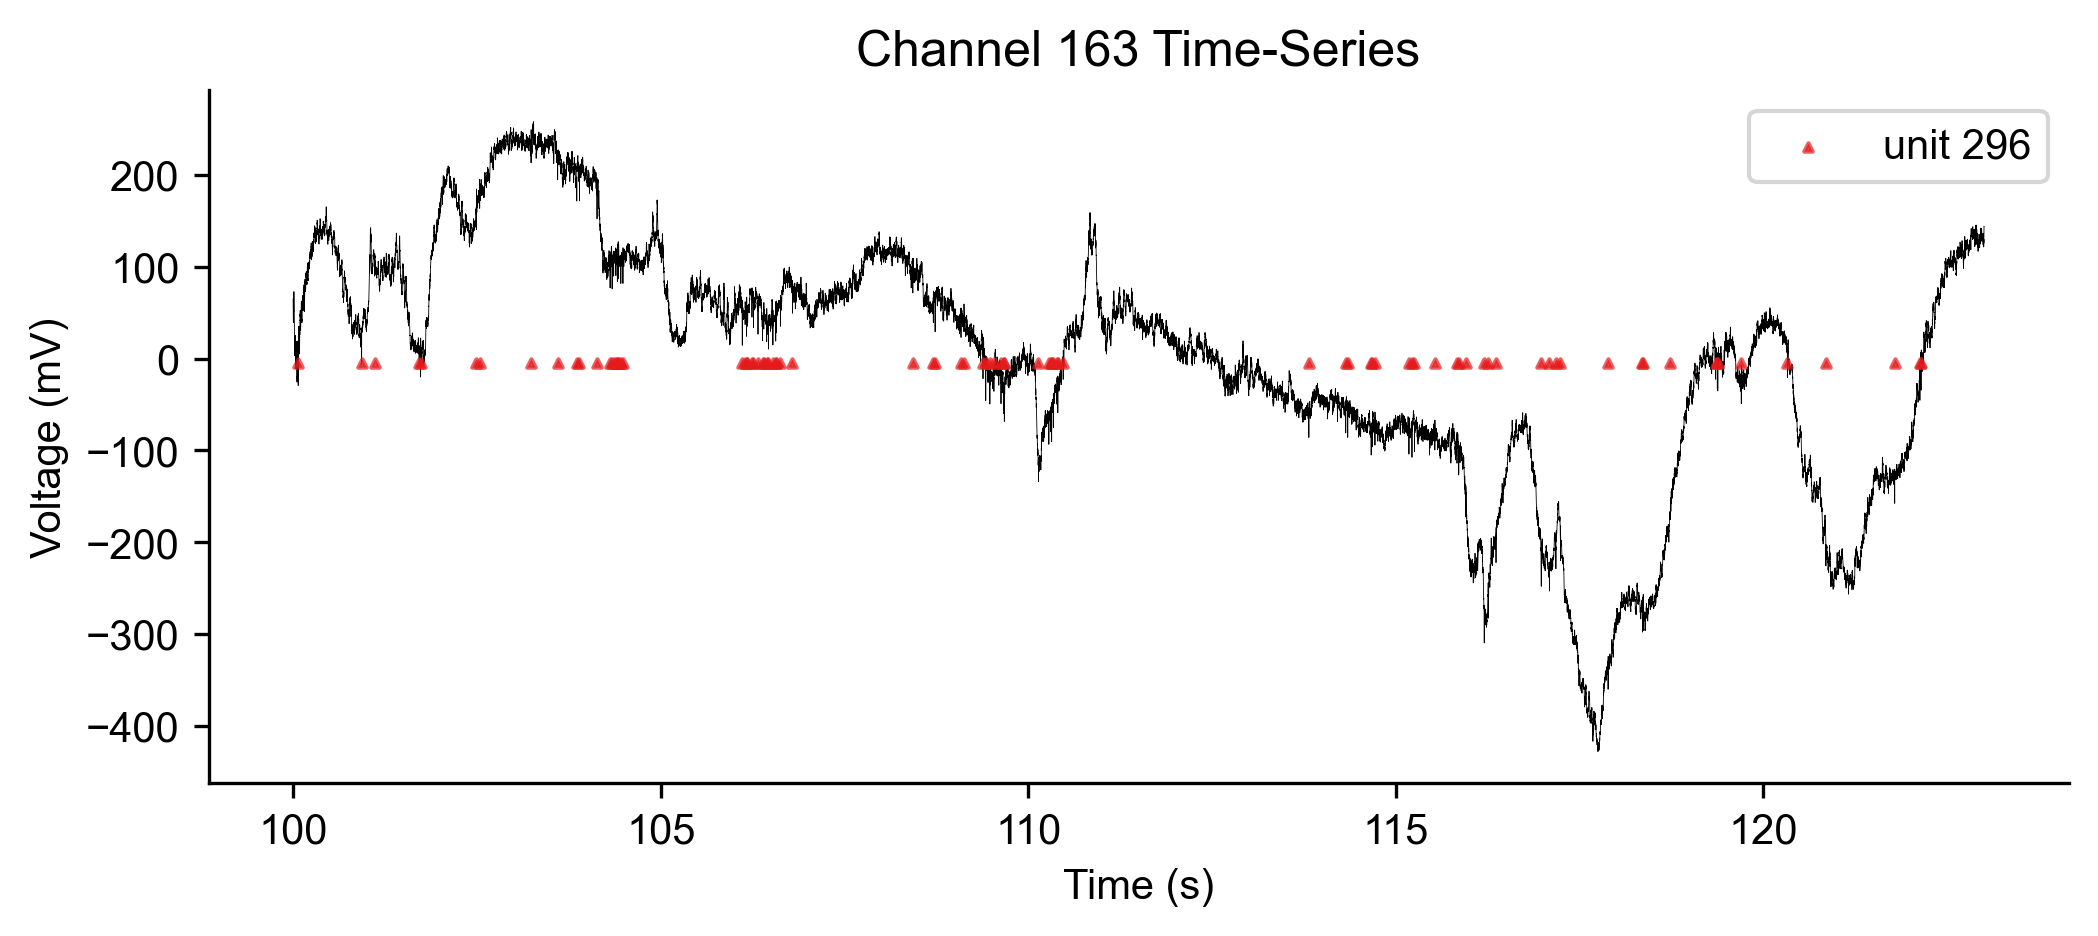

In [5]:
channel_signals['ch163'].plot_signal(spky=-5)
#plt.ylim((-20,20))

In [6]:
ch163_PSD,mt_freqs = fn.spectrafuncs.multitaper_psd(channel_signals['ch163'].time_series, fs=fs, thbp=11.5, start_time=channel_signals['ch163'].time_axis[0])
#ch13_PSD,mt_freqs = fn.spectrafuncs.multitaper_psd(channel_signals['ch13'].time_series, fs=fs, start_time=channel_signals['ch163'].time_axis[0])

Multitaper frequency resolution: 1.0
Multitaper number of tapers: 22


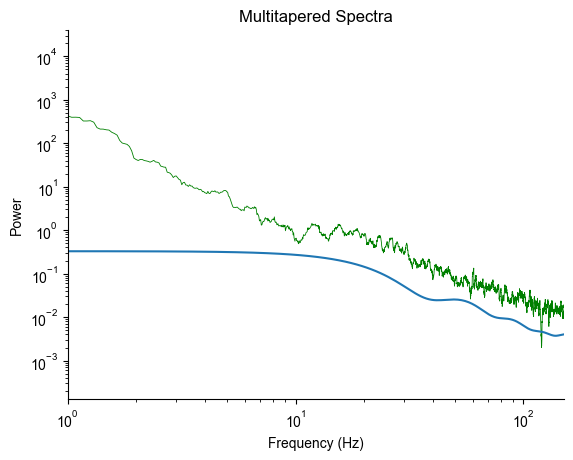

In [61]:
plt.figure()
#plt.semilogy(mt_freqs, ch13_PSD, color='k', linewidth=0.6)
plt.loglog(mt_freqs, ch163_PSD, color='g', linewidth=0.6)
plt.loglog(theor_freqs, u296_filters['waveform_instance']['filter_psd'] * 3.91)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Multitapered Spectra")
plt.xlim((1,150))
plt.show()

In [ ]:
plt.figure()
#plt.semilogy(mt_freqs, ch13_PSD, color='k', linewidth=0.6)
plt.loglog(mt_freqs, ch163_PSD, color='g', linewidth=0.6)
plt.loglog()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Multitapered Spectra")
plt.xlim((1,150))
plt.show()

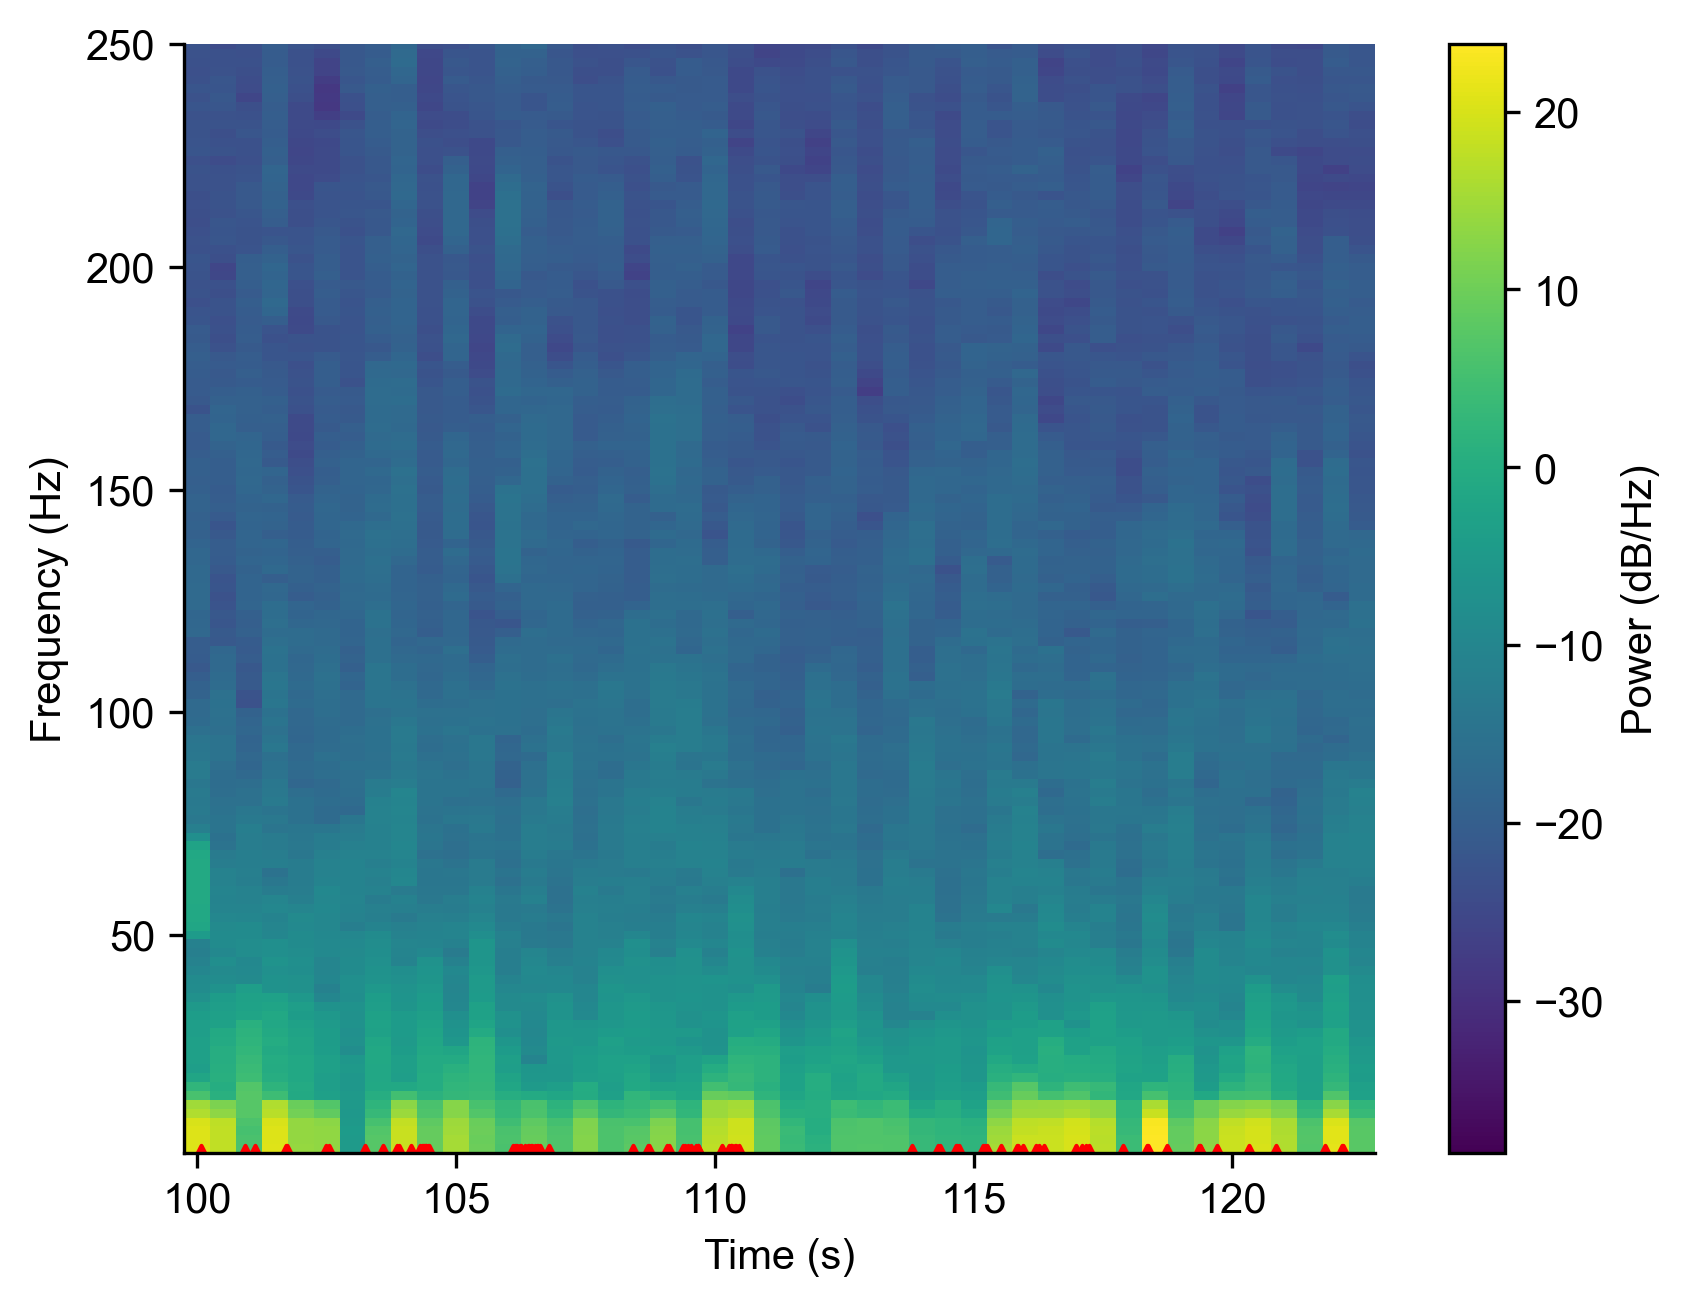

In [8]:
fn.spectrafuncs.plot_spectrogram(channel_signals['ch163'].time_series, fs, spk_train=channel_signals['ch163'].spike_times[296], time_halfbandwidth_product=5.75,
                                 window_duration=0.5,
                                 window_step=0.5,
                                 start_time=channel_signals['ch13'].time_axis[0], ymin=1, ymax=250)